# Principal Component Analysis with Cancer Data

In [1]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file ( Breast Cancer CSV) into Python DataFrame and view top 10 rows

In [2]:
cancer_df = pd.read_csv("breast-cancer-wisconsin-data.csv")
cancer_df.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [3]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [0]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [4]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [13]:
cancer_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
ClumpThickness,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
Cell Size,699.0,3.134478e+00,3.051459,1.0,1.0,1.0,5.0,10.0
Cell Shape,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
Normal Nucleoli,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
Bland Chromatin,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0
Class,699.0,2.689557e+00,0.951273,2.0,2.0,2.0,4.0,4.0


# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [6]:
cancer_df.isnull().values.any()

False

In [10]:
cancer_df['Bare Nuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [19]:
mode = cancer_df['Bare Nuclei'].mode()[0]

In [12]:
cancer_df['Bare Nuclei'].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [21]:
cancer_df['Bare Nuclei']=cancer_df['Bare Nuclei'].replace('?',mode)

In [22]:
cancer_df['Bare Nuclei']=cancer_df['Bare Nuclei'].astype('int64')

In [24]:
cancer_df.dtypes

ID                             int64
ClumpThickness                 int64
Cell Size                      int64
Cell Shape                     int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int64
Normal Nucleoli                int64
Bland Chromatin                int64
Mitoses                        int64
Class                          int64
dtype: object

In [28]:
duplicateData = cancer_df.duplicated().sum()
 
print("Duplicate Rows based on a single column are:", duplicateData, sep='\n')

Duplicate Rows based on a single column are:
9


In [29]:
cancer_df = cancer_df.drop_duplicates()

In [0]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column

In [0]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?


In [0]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [0]:
# Check for correlation of variable

In [0]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

In [0]:
#Let us check for pair plots

In [0]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

C:\Users\Nivedita\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Nivedita\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


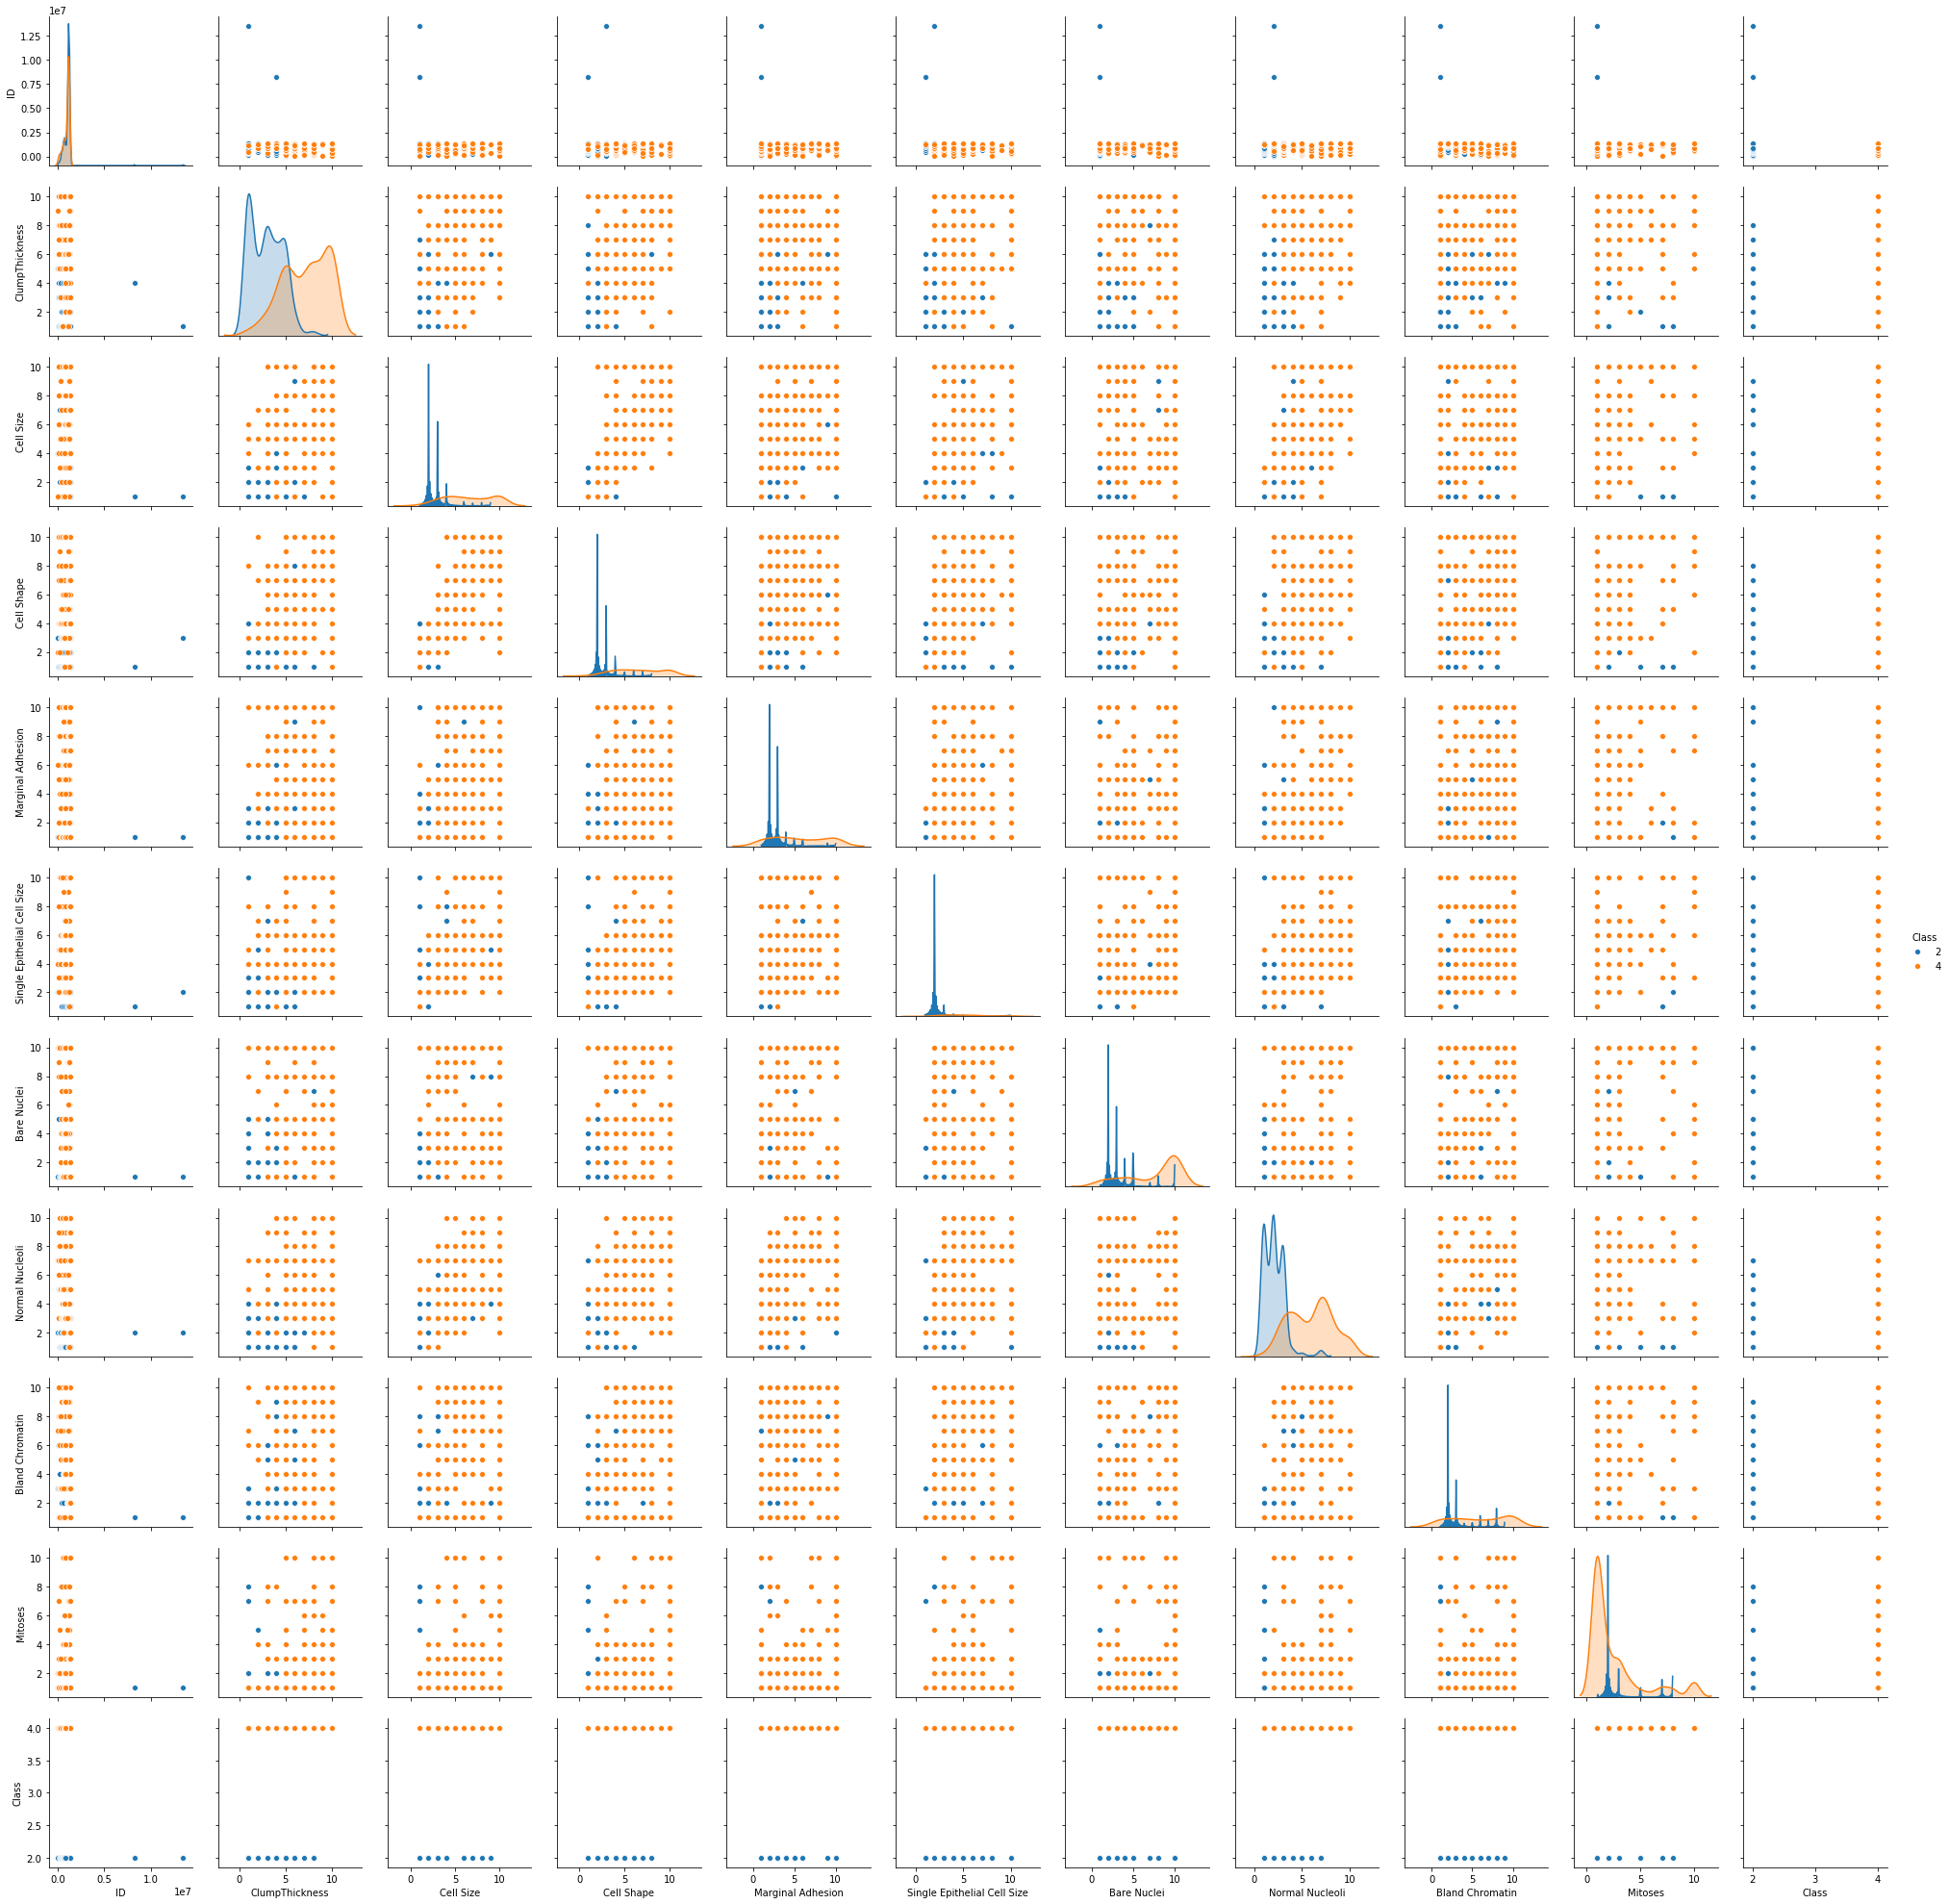

In [31]:
sns.pairplot(cancer_df,hue='Class')

In [32]:
cancer_df.corr()['Class'][:]

ID                            -0.080084
ClumpThickness                 0.716812
Cell Size                      0.817586
Cell Shape                     0.817551
Marginal Adhesion              0.701175
Single Epithelial Cell Size    0.681063
Bare Nuclei                    0.816655
Normal Nucleoli                0.756736
Bland Chromatin                0.715363
Mitoses                        0.423947
Class                          1.000000
Name: Class, dtype: float64

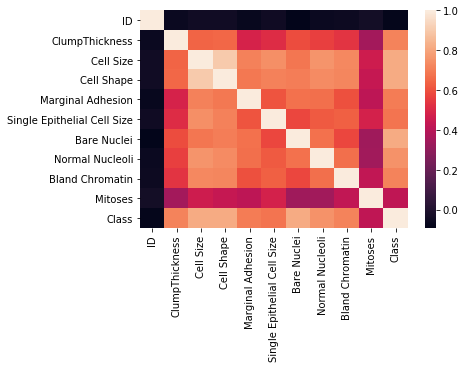

In [33]:
sns.heatmap(cancer_df.corr())

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [0]:
# We could see most of the outliers are now removed.

In [ ]:
#Drop Id column.
cancer_df = cancer_df.drop('ID',axis=1)

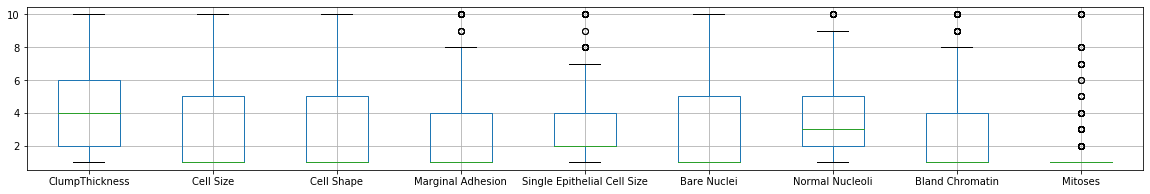

In [37]:
cancer_df.boxplot(column=['ClumpThickness','Cell Size','Cell Shape','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Normal Nucleoli','Bland Chromatin','Mitoses'],figsize=(20,3))

In [45]:
#pd.crosstab(cancer_df['Marginal Adhesion'],cancer_df['Class'])

In [46]:
#cancer_df['Marginal Adhesion'] = np.where(cancer_df['Marginal Adhesion'] > 4,4,cancer_df['Marginal Adhesion'])

In [47]:
#pd.crosstab(cancer_df['Single Epithelial Cell Size'],cancer_df['Class'])

In [48]:
#cancer_df['Single Epithelial Cell Size'] = np.where(cancer_df['Single Epithelial Cell Size'] > 7,4,cancer_df['Single Epithelial Cell Size'])

In [49]:
def treat_outliers(df, colname):
    data = df[colname]
    irq = np.quantile(a=data,q=0.75)-np.quantile(a=data,q=0.25)
    ub = np.quantile(a=data,q=0.75) + 1.5 * irq
    df[colname] = df[colname].apply(lambda x: ub if x > ub else x)
   

for i in cancer_df.columns:
    treat_outliers(cancer_df,i)

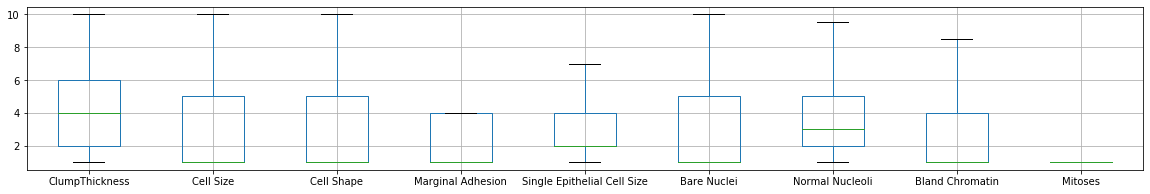

In [50]:
cancer_df.boxplot(column=['ClumpThickness','Cell Size','Cell Shape','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Normal Nucleoli','Bland Chromatin','Mitoses'],figsize=(20,3))

In [51]:
cancer_df.shape

(690, 10)

In [59]:
#Drop Class column.
cancer_df = cancer_df.drop('Class',axis=1)

In [62]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
cancer_df_scaled = sc.fit_transform(cancer_df)

# Q6 Create a covariance matrix for identifying Principal components

In [0]:
# PCA
# Step 1 - Create covariance matrix


In [63]:
cov_matrix = np.cov(cancer_df_scaled.T)

print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[1.00145138 0.64410677 0.65453792 0.55329897 0.53403385 0.59150555
  0.56498384 0.54618447 0.        ]
 [0.64410677 1.00145138 0.9066632  0.72204998 0.73745171 0.68556472
  0.76104659 0.73121148 0.        ]
 [0.65453792 0.9066632  1.00145138 0.7042574  0.71431099 0.70518656
  0.7400641  0.72792357 0.        ]
 [0.55329897 0.72204998 0.7042574  1.00145138 0.65859415 0.69693138
  0.68322615 0.62904797 0.        ]
 [0.53403385 0.73745171 0.71431099 0.65859415 1.00145138 0.62229193
  0.64147012 0.68037115 0.        ]
 [0.59150555 0.68556472 0.70518656 0.69693138 0.62229193 1.00145138
  0.67794772 0.59581302 0.        ]
 [0.56498384 0.76104659 0.7400641  0.68322615 0.64147012 0.67794772
  1.00145138 0.6767848  0.        ]
 [0.54618447 0.73121148 0.72792357 0.62904797 0.68037115 0.59581302
  0.6767848  1.00145138 0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]]


# Q7 Identify eigen values and eigen vector

In [0]:
# Step 2- Get eigen values and eigen vector

In [64]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[ 0.31192352  0.00921854 -0.8593039  -0.28315557 -0.13410749 -0.18485001
  -0.12007428 -0.13216006  0.        ]
 [ 0.38510256  0.72432593  0.06630731 -0.17925344  0.15232718  0.24948103
   0.45284487 -0.00258441  0.        ]
 [ 0.38281996 -0.67878581  0.00672847 -0.17137102  0.16900631  0.38747545
   0.42150241  0.08319114  0.        ]
 [ 0.34974706 -0.04278791  0.09868364  0.49716393 -0.21399652  0.07440269
  -0.01994541 -0.75313191  0.        ]
 [ 0.34619913 -0.05153662  0.33032964 -0.19089969 -0.70685597 -0.39986125
   0.12351557  0.23903828  0.        ]
 [ 0.34462486  0.07541055 -0.17110349  0.60770466 -0.06908046  0.24940784
  -0.25890847  0.58562413  0.        ]
 [ 0.3564919  -0.06257077  0.12347445  0.15062754  0.60093334 -0.68384502
   0.01332874  0.04605747  0.        ]
 [ 0.34614883  0.02069056  0.30622932 -0.42745155  0.13753408  0.24120407
  -0.72109933 -0.07862819  0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.       

# Q8 Find variance and cumulative variance by each eigen vector

In [68]:
tot = sum(eig_vals)
print("Sorted Eigen Values\n",sorted(eig_vals, reverse=True))
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
print("Variance explained \n",var_exp)
cum_var_exp = np.cumsum(var_exp)   # array of size =  as many PC dimensions
print("Cumulative Variance Explained", cum_var_exp)

Sorted Eigen Values
 [5.718424464559246, 0.5197453133941499, 0.44839282313159007, 0.35553621741295927, 0.30998816280710495, 0.2961649882474199, 0.27197376234477727, 0.09138529858170968, 0.0]
Variance explained 
 [71.37671116089346, 6.487400741459587, 5.59678723075481, 4.437761844158132, 3.8692363075017258, 3.6966970453346426, 3.394744968397672, 1.140660701499963, 0.0]
Cumulative Variance Explained [ 71.37671116  77.8641119   83.46089913  87.89866098  91.76789728
  95.46459433  98.8593393  100.         100.        ]


# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [69]:
from sklearn.decomposition import PCA

In [70]:
pca = PCA(n_components=7)
pca.fit(cancer_df_scaled)

PCA(copy=True, iterated_power='auto', n_components=7, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [72]:
pca_transformed = pca.transform(cancer_df_scaled)
pca_transformed.shape

(690, 7)

In [83]:
list(cancer_df)

['ClumpThickness',
 'Cell Size',
 'Cell Shape',
 'Marginal Adhesion',
 'Single Epithelial Cell Size',
 'Bare Nuclei',
 'Normal Nucleoli',
 'Bland Chromatin',
 'Mitoses']

# Q10 Find correlation between components and features

In [87]:
new_df=pd.DataFrame(pca.components_, columns = list(cancer_df))

In [89]:
new_df

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,0.311924,0.385103,0.382820,0.349747,0.346199,0.344625,0.356492,0.346149,-0.0
1,0.859304,-0.066307,-0.006728,-0.098684,-0.330330,0.171103,-0.123474,-0.306229,-0.0
2,0.283156,0.179253,0.171371,-0.497164,0.190900,-0.607705,-0.150628,0.427452,0.0
3,0.134107,-0.152327,-0.169006,0.213997,0.706856,0.069080,-0.600933,-0.137534,-0.0
4,-0.120074,0.452845,0.421502,-0.019945,0.123516,-0.258908,0.013329,-0.721099,0.0
5,-0.132160,-0.002584,0.083191,-0.753132,0.239038,0.585624,0.046057,-0.078628,-0.0
6,0.184850,-0.249481,-0.387475,-0.074403,0.399861,-0.249408,0.683845,-0.241204,-0.0


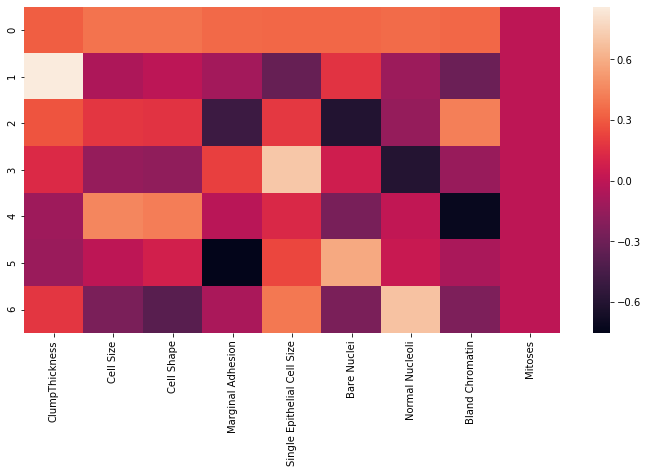

In [92]:
plt.figure(figsize=(12,6))
sns.heatmap(new_df)

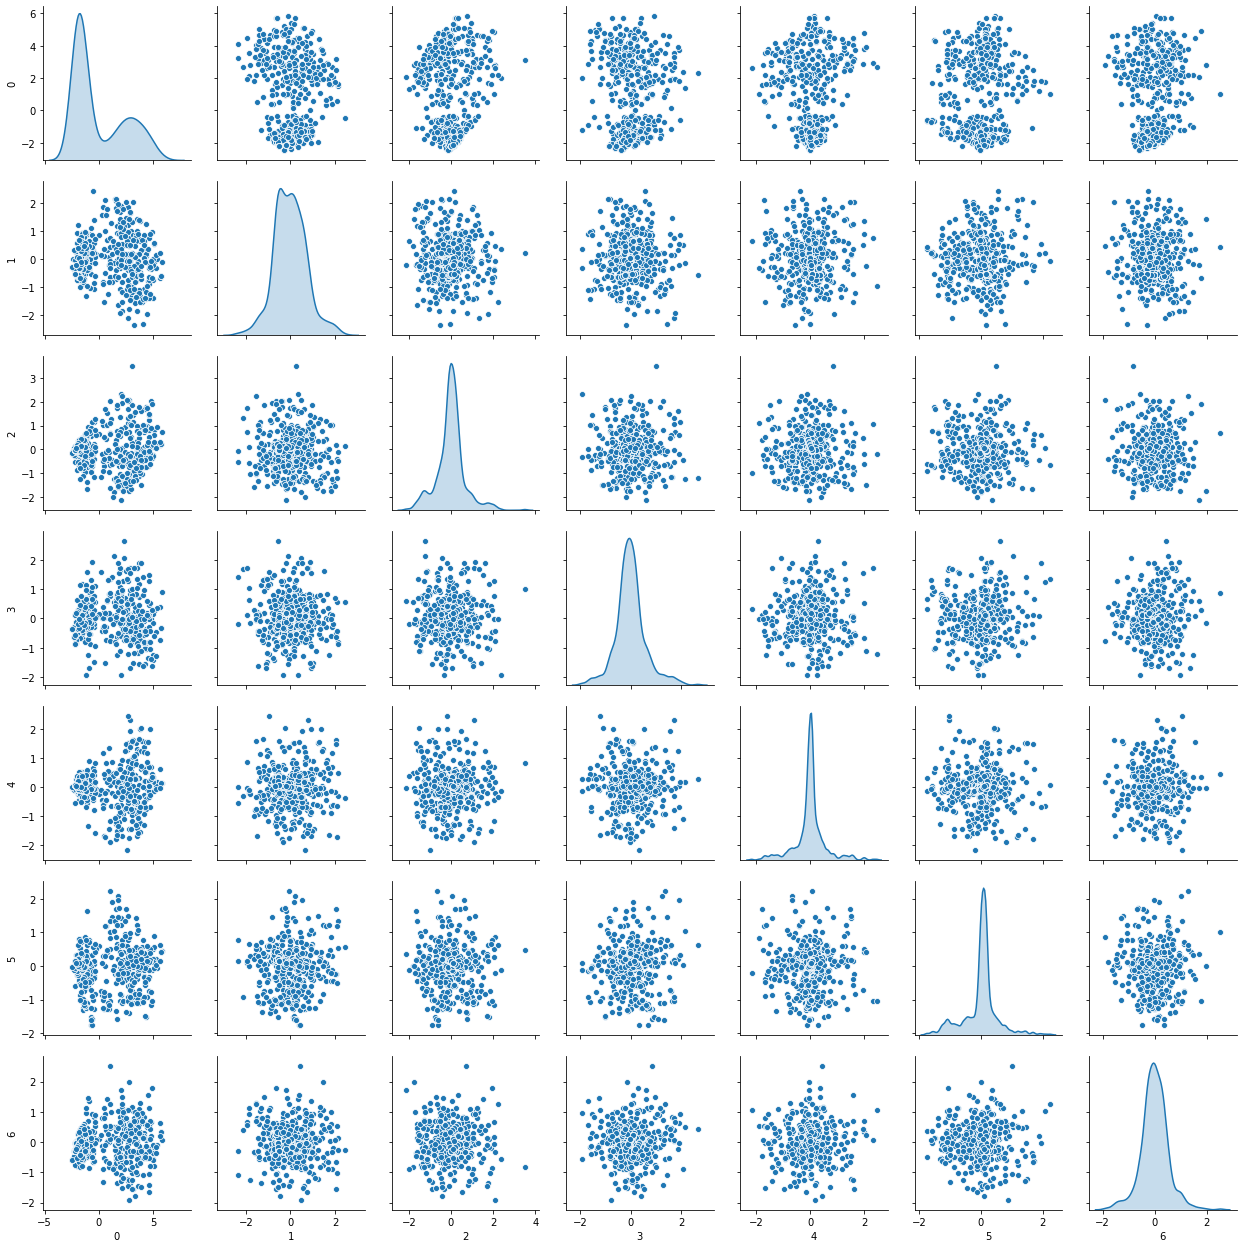

In [91]:
pca_transformed_df = pd.DataFrame(data=pca_transformed)
sns.pairplot(pca_transformed_df, diag_kind='kde')

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q11 Read the dataset(jokes.csv)


In [148]:
ratings = pd.read_csv("jokes.csv")

In [149]:
ratings.head()

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q12 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [150]:
ratings = ratings.iloc[0:200,1:102]
ratings.shape

(200, 100)

In [151]:
ratings.head()

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q13 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [152]:
ratings = ratings.replace(99.00,0)

In [153]:
ratings.head()

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,0.00,0.00,0.00,0.00,0.00,-5.63,0.00,0.00,0.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,0.00,0.00,0.00,0.00,9.03,9.27,9.03,9.27,0.00,0.00,...,0.00,0.00,0.00,9.08,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,8.35,0.00,0.00,1.80,8.16,-2.82,6.21,0.00,1.84,...,0.00,0.00,0.00,0.53,0.00,0.00,0.00,0.00,0.00,0.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


### Popularity based recommendation system

# Q14  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [159]:
ratings_diff = ratings.mean(axis = 0, skipna = True)


In [160]:
ratings_diff.head(2)

Joke1    0.53005
Joke2    0.59390
dtype: float64

In [164]:
ratings_diff= ratings_diff.sort_values(ascending=False)

In [165]:
ratings_diff.head(10)

Joke50    4.05540
Joke36    3.61150
Joke53    3.57150
Joke35    3.22315
Joke29    3.18995
Joke27    3.05240
Joke62    2.86185
Joke49    2.85000
Joke32    2.77955
Joke31    2.65710
dtype: float64